In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('icfes_bogota.csv', sep = ',', low_memory=False)

In [3]:
columnas = {'ESTU_GENERACION-E',
            'COLE_MCPIO_UBICACION', 
            'COLE_DEPTO_UBICACION',
            'ESTU_MCPIO_PRESENTACION', 
            'ESTU_DEPTO_PRESENTACION',
            'ESTU_TIPOREMUNERACION',
            'ESTU_NACIONALIDAD',
            'ESTU_PAIS_RESIDE',
            'ESTU_DEPTO_RESIDE',
            'ESTU_MCPIO_RESIDE',
            'FAMI_ESTRATOVIVIENDA',
            'FAMI_TRABAJOLABORPADRE',
            'FAMI_TRABAJOLABORMADRE',
            'FAMI_TIENELAVADORA',
            'FAMI_NUMLIBROS',
            'FAMI_SITUACIONECONOMICA'}
datos.drop(columnas, axis=1, inplace=True)

In [4]:

from sklearn.model_selection import train_test_split


In [5]:
columnas = ['FAMI_PERSONASHOGAR',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'ESTU_NSE_INDIVIDUAL',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_DEDICACIONINTERNET',
 'ESTU_HORASSEMANATRABAJA',
 'COLE_CARACTER',
 'COLE_AREA_UBICACION',
 'COLE_JORNADA',
 'EDAD']

In [6]:
datos = datos[(datos['EDAD'] >= 10) & (datos['EDAD'] <= 90)]

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Codifica tus columnas categóricas
datos_codificados = pd.get_dummies(datos)

# Define tus características y etiquetas
X = datos_codificados.drop('PUNT_GLOBAL', axis=1)
datos_codificados['RESULTADO'] = pd.cut(datos_codificados['PUNT_GLOBAL'], bins=4, labels=['Bajo', 'Intermedio ', 'Alto', 'Sobresaliente'])
y = datos_codificados['RESULTADO']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Crea y entrena tu modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Haz predicciones con tu modelo
y_pred = model.predict(X_test)

# Evalúa tu modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy}')


Precisión: 0.9897766262866746


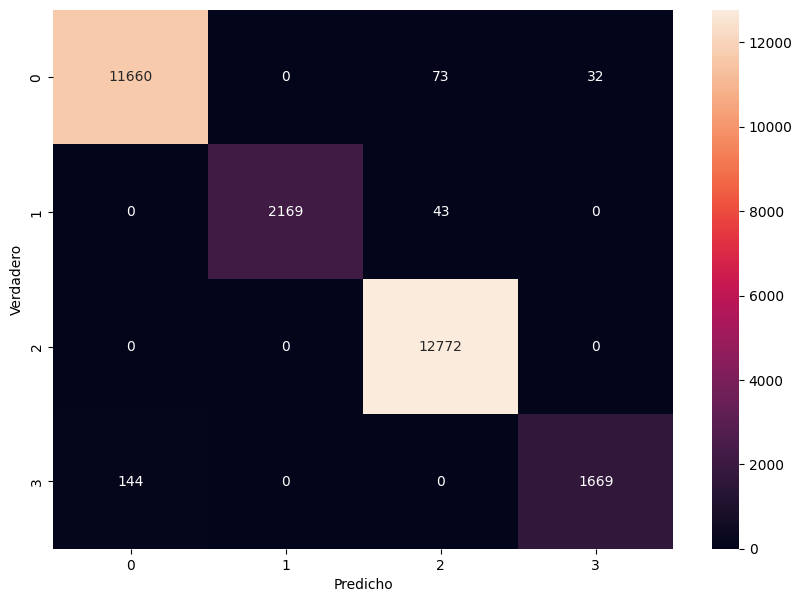

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()
